# **Tutorial 12: Practical Examples of OOP Paradigm** 👀

Computer games are quite suitable to practice **object oriented modelling** and **design**. Making simple games can demonstrate the effectiveness of **object orientation** to easily scale projects and build larger software components. In these special themed mini-projects, we will develop simple games using **object oriented approach**.

<br><br><a id='t1cls'></a>
## ▙▂ **Part 3: Pygame Basics ▂▂**

In the third mini-project, we will first explore the basics of Pygame library and use it to create basic game components such, as device and surface. Then, we will see how to draw simple shapes on the surface and handle Pygame events.

In the end, we will design and implement `GameTemplate` class to encapsulate those Pygame calls, and allow the developers, using our library, to develop a game without having to go deep into Pygame mechanics. `GameTemplate` class will use very similar game loop like the one in `Game` class that we developed and used for mini-projects 1 and 2.

<a id='t11p3toc'></a>

#### Contents: ####
- [Installing Pygame](#t11p3install)
- [Launching Pygame](#t11p3launch)
    - [Launching the Game and Listening to Events](#t4p1lgle)
    - [What Pygame Commands Do (Optional)](#t4p1wpcd)
- [Terminate Pygame](#t11p3terminate)
- [Surface, Circle and User Input](#t11p3example2)
    - [Test and Experiment](#t11p3tae)
    - [Challenge](#t11p3Challenge)
- [GameTemplate Class](#t11p3gametemplate)
- [A Game with GameTemplate](#t11p3example3)
- [Discussion on GameTemplate Design (Optional)](#t11p3design)


<a id='t11p3install'></a>
#### **▇▂ Installing Pygame ▂▂**


A standard Python distribution doesn't include Pygame library, therefore the first step is to install it. The process doesn't differ from those we used to install matplotlib and Jupyter in Analysis 2.

- Standard Python users should use `pip` command in shell / command prompt: ```pip install pygame ``` <br>
- Those using Anaconda should replace `pip` with `conda` (note: extra parameters may be required; check Pygame documentation), or open Tools or Environments (depending on your distribution), find installation and install it from there. <br>
- If you have Pyzo, you can run `install pygame` from your console. Pyzo is generally good at figuring out which environment you have (works with standard Python and Anaconda) and will invoke the proper installation command.

To test if your installation has been completed successfully, launch any Python environment and import Pygame. If no errors are raised, Pygame is installed on your system. If not, repeat the installation procedure.

In [ ]:
import pygame

For more information on Pygame, documentation and examples, please visit the official Pygame page at: [pygame.org](https://www.pygame.org).

<br>[back to top ↥](#t11p3toc)

<a id='t11p3launch'></a>
#### **▇▂ Launching Pygame ▂▂**

When making a game, the first step is usually a game that does ... 'nothing'. More precisely, we want to initialize, run and close the game. With that completed, we can add other components incrementally.

Steps needed to launch a game with Pygame library:
- initialize Pygame,
- create display,
- set display,
- listen to game events,
- handle quit event,
- deallocate Pygame resources.

Display is responsible to communicate with your graphics card via operating system (OS). It is used to create a game window (or full screen), set resolution and display Pygame surfaces.

While running, Pygame will 'listen' to your devices, such as keyboard, mouse, joystick, etc. More importantly, it will also 'listen' to system calls sent by our OS. Unless we want to forcefully terminate our game, which is never the best choice, we want to detect `pygame.QUIT` event, generated when a user terminates Pygame window. Once such message is received, Pygame should close and deallocate resources.

<br>[back to top ↥](#t11p3toc)

<a id='t4p1lgle'></a>
##### **Launching the Game and Listening to Events**

Running the code below will create Pygame window, listen to events and print them out, until `pygame.QUIT` message is received. Observe the events generated. Try moving your mouse and clicking inside of the game window. Experiment using your keyboards. When finished, click to close the window. This will generate quit message.

Note: Running this program will generate a lot of event messages. Although Jupyter can launch Pygame, it has limitations on how many lines it can print, and how quickly it can do that. Therefore, it is recommended to copy-paste this code into your IDE and run it locally.

In [ ]:
pygame.init()

gameDisplay = pygame.display
gameDisplay.set_mode((800,600))
gameDisplay.set_caption('Our first "game"')

clock = pygame.time.Clock()

game_running = True
while game_running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            game_running = False

        print(event)

    gameDisplay.update()
    clock.tick(60)

pygame.quit()

<br>[back to top ↥](#t11p3toc)

<a id='t4p1wpcd'></a>
##### **What Pygame Commands Do (Optional)**

The following is not of interest for this topic, but if you want to know more about Pygame, this is the brief explanation what the commands that we used do.

`pygame.init()` - initializes Pygame. Must be run first (before any other Pygame command).

`gameDisplay = pygame.display` - creates display object. In our case we save it as variable `gameDisplay`.

`gameDisplay.set_mode((800,600))` - sets resolution. Expects a tuple in form *(x, y)* representing the number of pixels.

`gameDisplay.set_caption('Our first "game"')` - sets Pygame window caption. Optional.

`clock = pygame.time.Clock()` - creates Pygame Clock object. Optional, but important if you want a stable frame rate.

`pygame.event.get()` - returns Pygame events. **Important:** while running, Pygame will `listen` and store all events it receives. Once called, it will return all events from its buffer. This will also clear it.

`pygame.QUIT` - the event sent when OS wants to terminate the application.

`gameDisplay.update()` - This is the moment where all information (objects, shapes, sprites) that we want to render are sent to the graphics adapter. Essentially, all drawing is presented to the user once `.update()` is invoked.

`clock.tick(60)` - sets number of ticks forcing Pygame to wait. The value corresponds to frames per second, hence, the higher the value, the less time (milliseconds) Pygame will wait.

`pygame.quit()` - deallocates Pygame resources. Must be called at the end.

<br>[back to top ↥](#t11p3toc)

<a id='t11p3terminate'></a>
#### **▇▂ Terminate Pygame ▂▂**

No one writes a game with no bugs in one go. Often, your mistakes will cause your code to crash, but Pygame will still be running. If that happens just type the following line in your console:

In [ ]:
pygame.quit()

Note: if you run from Jupyter, you will have to interrupt your kernel.

<br>[back to top ↥](#t11p3toc)

<a id='t11p3example2'></a>
#### **▇▂ Surface, Circle and User Input ▂▂**


A Pygame **surface** can be considered as a blank piece of paper on which we do our drawing. Upon creating our device, we want to create a surface to write our data to. Every shape or image drawn typically uses a separate surface. Surfaces have fast method of ***blitting*** (copying) data from one to another. The surface is rendered at the point we call `pygame.display.update()`.

- To get the surface used by our display, call ```pygame.display.get_surface() ``` which is `screen = gameDisplay.get_surface()` in our example.

- To draw a circle, use `pygame.draw.circle()` and pass to it: surface, color, center and radius. There are more optional parameters which you can find at the official [Pygame](https://www.pygame.org/docs/ref/draw.html?highlight=draw%20circle#pygame.draw.circle) page.

- To handle inputs from the user, we need to process Pygame events, and look for those of **type** == `pygame.KEYDOWN` which occur when a key is pressed, or **type** == `pygame.UP` which occur when a key is released.

We will also use `surface.fill() method` which fills entire surface with a given color. That color is a tuple containing three integer values **RGB** representing the amount of **R**ed, **G**reen and **B**lue. <br> Example: <br>```gameDisplay = pygame.display
screen = gameDisplay.get_surface()
screen.fill((255, 0, 0))   # fills screen in red
```

In [ ]:
## IMPORT SECTION

import pygame

## CONSTANTS

DEBUG = True

## GLOBALS

X, Y  = 400, 300

## HANDY FUNCTIONS

def log(text, debug_mode = DEBUG):
    if debug_mode:
        print(text)

## SIMPLE PLOTTING

def plot_circle(x, y, radius = 25, color = (255, 255, 255)):
    # note: so far we handle surface 'ugly' as global
    global screen
    pygame.draw.circle(screen, color, (x,y), radius)

## CORE OF OUR GAME
# initialize pygame
pygame.init()

# create and set display
gameDisplay = pygame.display
gameDisplay.set_caption('Our second "game"')
gameDisplay.set_mode((800, 600))

# create screen and fill it with green color
screen = gameDisplay.get_surface()
screen.fill((0, 255, 0))
# create game clock
clock = pygame.time.Clock()

# basic pygame loop
# set running flag to True and stay in game loop until the flag is changed
game_running = True
while game_running:
    # get all events received up to this point
    for event in pygame.event.get():
        # check if event is QUIT event, and if so, alter game running flag
        if event.type == pygame.QUIT:
            log("QUIT event received. Shutting down.")
            game_running = False
        
        # if key is pressed
        if event.type == pygame.KEYDOWN:
            # check if that key is ESC (user wants to quit the game); alter game running flag
            if event.key == pygame.K_ESCAPE:
                log("User pressed ESC.")
                game_running = False

            # if pressed buttons are LEFT or RIGHT, alter X coordinate
            if event.key == pygame.K_RIGHT:
                X += 40
            if event.key == pygame.K_LEFT:
                X -= 40

    # clear surface by filling it with green color
    screen.fill((0, 255, 0))
    # plot circle with the center at X,Y
    plot_circle(X,Y)

    # call update to present our surface (screen) to gameDisplay
    gameDisplay.update()
    # synchronize with clock
    clock.tick(60)

# deallocate memory
gameDisplay.quit()
pygame.quit()


<br>[back to top ↥](#t11p3toc)

<a id='t11p3tae'></a>
##### **Test and Experiment**

- The example above only moves the circle along X axis. Adjust the code such that we can use arrow up and arrow down to move the circle along Y axis.
- Change `screen.fill()` to clear the screen with blue color.
- Try commenting out `screen.fill()` and moving the circle. What happens?
- Try moving circle outside of the drawing area. What happens?
- Add code such that when a user presses space, the circle is re-centered on the screen.

<a id='t11p3Challenge'></a>
##### **Challenge**

In games it is important to distinguish a single click / button press from holding a button. Can you make adjustment to the code such that the circle is displayed ONLY when a button (of your choice) is held down? <br>
HINT: use helper Boolean variable.

<br>[back to top ↥](#t11p3toc)

<a id='t11p3gametemplate'></a>
#### **▇▂ GameTemplate Class ▂▂**

The structure forced upon us by Pygame (order of initialization, display, surfaces, events, ...) will quickly make even the smallest games, with only few objects and inputs from the user, to produce a code that is difficult to improve and maintain in the long run. When we want to develop a game, we want to focus on game logic, independently of the module or game engine used to render our images. Therefore, we need something to "hide" the lower level of communication with Pygame module.

This is where OOP comes in all of its glory. We can create `GameTemplate` class, which will hide and **encapsulate** the mechanics of **Pygame**, while **abstracting and exposing** to a developer only the **specific methods** that represent steps of the game loop. Finally, using **inheritance**, we can extend `GameTemplate`, **override** the methods needed and develop **a new child class** tailored specifically for our game.

In [ ]:
## IMPORT SECTION

import pygame


## CONSTANTS & GLOBALS

DEBUG = True

FPS = 30
WINDOW = (800, 600)
CAPTION = "ANALYSIS3 - obj. orient. game template"



## GAMETEMPLATE CLASS

class GameTemplate:
    """
    GameTemplate class encapsulates basic game loop that
    is implemented via pygame library.
    Override and implement game loop methods for your specific game.
    """

    def __init__(self):
        self.__running = True
        self._fps = None
        self._window = None
        self._display = None
        self._surface = None
        self._clock = None
        self._caption = None

        self._initialize_pygame()

    # gets & sets

    def get_display(self):
        return self._display

    def get_surface(self):
        return self._surface

    def set_fps(self, fps):
        self._fps = fps

    def get_fps(self):
        return self._fps

    def set_window(self, width, height):
        self._window = (width, height)

    def get_window(self):
        return self._window

    def set_caption(self, caption):
        self._caption = caption

    def get_caption(self):
        return self._caption

    # handy methods

    def log(self, text, debug_mode = DEBUG):
        if debug_mode:
            print(text)


    # encapsulating Pygame

    def _initialize_pygame(self):
        pygame.init()
        self._display = pygame.display
        self._clock = pygame.time.Clock()

    def _launch_pygame_window(self, width, height, fps, caption):
        self.set_window(width, height)
        self.set_fps(fps)

        self._display.set_caption(caption)
        self._display.set_mode(self._window)
        self._surface = self._display.get_surface()
        self._surface.fill((0,0,0))


    # to be extended by a child class
    def start(self):
        # If window size, FPS and caption have not been set, use default values
        if self._window == None:
            window = WINDOW
        else:
            window = self._window

        if self._fps == None:
            fps = FPS
        else:
            fps = self._fps

        if self._caption == None:
            caption = CAPTION
        else:
            caption = self._caption

        self._launch_pygame_window(window[0], window[1], fps, caption)
        self.__running = True

    def _deallocate_memory(self):
        pygame.quit()

    # to be extended by a child class
    def finish(self):
        self._deallocate_memory()

    def _check_quit_event(self, event):
        # default quit events
        # quit sent by the system
        if event.type == pygame.QUIT:
            self.__running = False
            self.log("QUIT event received. Shutting down.")

        # user pressed ESC
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE:
                self.__running = False
                self.log("User pressed ESC.")

    # to be overridden by a child class
    def process_event(self, event):
        pass

    def do_events(self):
        # check new events; handle quit if received;
        # send all other events to process_event for handling
        for event in pygame.event.get():
            self._check_quit_event(event)
            self.process_event(event)

    # to be overridden by a child class
    def do_game_logic(self):
        pass

    # to be overridden by a child class
    def draw(self):
        self._surface.fill((0,0,0))

    def _end_frame(self):
        # steps taken at the end of each frame
        self._display.update()
        self._clock.tick(self._fps)

    # can be extended by a child class, or only extend draw()
    def do_frame(self):
        # call draw which will be overridden by a child class
        # and call _end_frame()
        self.draw()
        self._end_frame()

    # game loop
    def run(self):
        self.start()

        while self.__running:
            self.do_events()
            self.do_game_logic()
            self.do_frame()

        self.finish()

Let us test if it works. Instantiating `GameTemplate` and running it should allow us to create a Pygame window and terminate it with ESC.

In [ ]:
game = GameTemplate()
game.run()

Try changing resolution. For example, use (640, 480).

In [ ]:
game = GameTemplate()
game.set_window(640, 480)
game.run()

Write your name as window caption and run the template.

In [ ]:
# your code here
# game = 


<br>[back to top ↥](#t11p3toc)

<a id='t11p3example3'></a>
#### **▇▂ A Game with GameTemplate ▂▂**

Let us try to make the same game, this time using `GameTemplate` class. We will only alter `plot_circle` to allow using surface as parameter. This is the section of the code we will just repeat.

In [ ]:
## IMPORT SECTION
import pygame

## CONSTANTS
DEBUG = True

## HANDY FUNCTIONS
def log(text, debug_mode = DEBUG):
    if debug_mode:
        print(text)

## SIMPLE PLOTTING
def plot_circle(surface, x, y, radius = 25, color = (255, 255, 255)):
    pygame.draw.circle(surface, color, (x,y), radius)
    
    

Here, we create a child class and override the methods needed. To avoid using global X and Y, we set them as attributes, which is the reason we extended method `start()`. To plot circle, we override `draw()`, clear the screen (fill with black) and call `plot_circle()` from here. Finally, our response to arrow left or arrow right on the keyboard is implemented in `process_event()`.

In [ ]:
class SimpleGame(GameTemplate):
    def start(self):
        super().start()
        self.X = 400
        self.Y = 300
        
    def draw(self):
        self.get_surface().fill((0,0,0))
        plot_circle(self.get_surface(), self.X, self.Y)
        
    def process_event(self, event):
        # check if this is KEYDOWN event
        if event.type == pygame.KEYDOWN:
            # if pressed buttons are LEFT or RIGHT, alter X coordinate
            if event.key == pygame.K_RIGHT:
                self.X += 40
            if event.key == pygame.K_LEFT:
                self.X -= 40

Instantiate and run.

In [ ]:
mygame = SimpleGame()
mygame.run()

Comparing this code with the example done as procedural program clearly demonstrates the strengths of object oriented paradigm. Through abstraction, encapsulation and inheritance, we made our code small, compact, easy to understand and modify.

<br>[back to top ↥](#t11p3toc)

<a id='t11p3design'></a>
#### **▇▂ Discussion on GameTemplate Design (Optional) ▂▂**

We mentioned in the previous mini-projects that there is no one best design. Here we discuss our design of `GameTemplate` class and the motivation behind it. Let us take a look at UML class diagram.

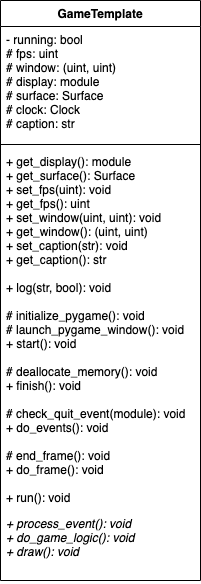

<br>[back to top ↥](#t11p3toc)

##### GameTemplate: attributes, gets and sets

This part is pretty much straight-forward. All essential elements used to make a skeleton of Pygame and game loop are encapsulated in attributes:
- running flag,
- game FPS,
- window size / resolution,
- pointer to the display device (module),
- pointer to the Surface (screen) object,
- game clock,
- window caption.

The `running` flag is essential for controlling our game loop, so we want to make sure it is not accidentally changed. Hence, it is made private. All other attributes are protected, to enable a child class easier access and modification if needed. Still, we provide gets and sets for them as well.

As nothing special is happening here, there will be no additional comments on this section of the code.

```
class GameTemplate:


    def __init__(self):
        self.__running = True
        self._fps = None
        self._window = None
        self._display = None
        self._surface = None
        self._clock = None
        self._caption = None

        self._initialize_pygame()

    # gets & sets

    def get_display(self):
        return self._display

    def get_surface(self):
        return self._surface

    def set_fps(self, fps):
        self._fps = fps

    def get_fps(self):
        return self._fps

    def set_window(self, width, height):
        self._window = (width, height)

    def get_window(self):
        return self._window

    def set_caption(self, caption):
        self._caption = caption

    def get_caption(self):
        return self._caption
        
    # ...
    
    # encapsulating Pygame

    def _initialize_pygame(self):
        pygame.init()
        self._display = pygame.display
        self._clock = pygame.time.Clock()
```

<br>[back to top ↥](#t11p3toc)

##### GameTemplate: logging

Debugging real-time applications can be quite taxing, as it is very hard to observe and recreate the same events that lead to a potential crash. Therefore, it is wise to enable internal logging mechanism, which can be triggered by functions of our choosing, to write all data, relevant to understanding what happened.

Normally, here we should make another dedicated logging class. To keep things simple, we opted for a basic print function only, that is turned on when DEBUG flag is set to true. Although, more sophisticated logging can be implemented in a child.

```
## CONSTANTS & GLOBALS

DEBUG = True

## GAMETEMPLATE CLASS

class GameTemplate:
    
    # ...
    
    # handy methods

    def log(self, text, debug_mode = DEBUG):
        if debug_mode:
            print(text)
    
    # ...
```

<br>[back to top ↥](#t11p3toc)

##### GameTemplate: game loop

Game loop is the core of our class and is invoked with `run()` method. Identical to mini-project 1 and 2, it contains five essential game loop steps, and calls designed method for each of those.

The idea behind is to enable developers to use just one method for running a game, making their code compact, while all five methods called within the game loop can be overridden. This improves code clarity.

```
class GameTemplate:
    # ...
 
    # game loop
    def run(self):
        self.start()

        while self.__running:
            self.do_events()
            self.do_game_logic()
            self.do_frame()

        self.finish()
```

We can see here that the game loops starts by calling the method `start()`, which is executed only once. Then, as long as the `running` flag is equal to true, we will successively call `do_events()`, `do_game_logic()` and `do_frame()`. Finally, when we exit the while loop by setting the `running` flag to false, `finish()` method will be executed. Here, we should do all game-related clean-up.

<br>[back to top ↥](#t11p3toc)

##### GameTemplate: start

Method `start()` is the first one (after initialization) to be called. The idea is to include here all the necessary commands to launch Pygame window, yet allow it to be easily extendable by our developers.

```
class GameTemplate:
    # ...
    
    # encapsulating Pygame
    
    def _launch_pygame_window(self, width, height, fps, caption):
        self.set_window(width, height)
        self.set_fps(fps)

        self._display.set_caption(caption)
        self._display.set_mode(self._window)
        self._surface = self._display.get_surface()
        self._surface.fill((0,0,0))

    # to be extended by a child class
    def start(self):
        # If window size, FPS and caption have not been set, use default values
        if self._window == None:
            window = WINDOW
        else:
            window = self._window

        if self._fps == None:
            fps = FPS
        else:
            fps = self._fps

        if self._caption == None:
            caption = CAPTION
        else:
            caption = self._caption

        self._launch_pygame_window(window[0], window[1], fps, caption)
        self.__running = True

    # ...
```

`start()` will check if window, fps and caption are provided. If any is missing, then the default value will be used. Then, this information will be used to set display, surface and start the window. With this choice we leave developers the option to either extend this method, or override it completely. In case of the latter, we still allow for easy call to `_launch_pygame_window()`, if only that part needs to be reused. This is the reason why it is set as protected method.

<br>[back to top ↥](#t11p3toc)

##### GameTemplate: events

There are always many events that have to be handled, therefore processing them as a distinct separate block is advised. Events are processed each frame within the game loop by calling `do_events()` method. From there, we leave two options for our developers. Should there be a need for specific event handling, then entire `do_events()` method can be overridden in a child class.

If `do_events()` is just inherited without any change, it gets all events from Pygame event buffer. Afterwards, `_check_quit_event()` is called to check and handle quit events. Normally, this can be reused as given in the parent class (the game quits when OS sends the quit message or user presses ESC), but can be also overridden if different termination process is desired. Finally, `process_event()` is called, which is an abstract method, and should be implemented in a child class, according to the specific needs of a game being programmed.

```
class GameTemplate:
    # ...
    
    def _check_quit_event(self, event):
        # default quit events
        # quit sent by the system
        if event.type == pygame.QUIT:
            self.__running = False
            self.log("QUIT event received. Shutting down.")

        # user pressed ESC
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE:
                self.__running = False
                self.log("User pressed ESC.")

    # to be overridden by a child class
    def process_event(self, event):
        pass

    def do_events(self):
        # check new events; handle quit if received;
        # send all other events to process_event for handling
        for event in pygame.event.get():
            self._check_quit_event(event)
            self.process_event(event)

    # ...
```

In short, just implement `process_event()` in a child class and handle events according to your game logic. If different termination is required, then override `_check_quit_event()`. Finally, for completely custom event handling, override `do_events()` method.

<br>[back to top ↥](#t11p3toc)

##### GameTemplate: game logic

This is just an abstract method that needs to be implemented in a child game class. Every game related object update needs to be handled in `do_game_logic()`.

```
class GameTemplate:
    # ...
    
    # to be overridden by a child class
    def do_game_logic(self):
        pass

    # ...
```

<br>[back to top ↥](#t11p3toc)

##### GameTemplate: draw

The final step in each frame is to render game objects. Similar to the way we designed event handling, we deal with rendering methods. Essentially, at each frame, all objects have to be rendered, and then Pygame display has to be updated, plus synchronize the update with the game timer. As these commands are invoked in almost every game, to free our developers, we moved them to the protected `_end_frame()` method.

In each frame, `run()` method will call `do_frame()` method. It will call the abstract `draw()` method, intended to be overridden by a child class, and implemented in such a way to render all game objects. To free developers from extending a parent's `draw()` method just to reuse `_end_frame()` part, `_end_frame()` was extended as a separate method.

Therefore, in most cases, the developers will want to implement just the `draw()` method. To allow additional flexibility (e.g. different synchronization is needed), we leave the option to override the entire `do_frame()` method. Note: although `draw()` should be abstract - empty, we have added one line to fill the screen with the black color. This was done to make early debugging easier.

```
class GameTemplate:
    # ...
    
    # to be overridden by a child class
    def draw(self):
        self._surface.fill((0,0,0))

    def _end_frame(self):
        # steps taken at the end of each frame
        self._display.update()
        self._clock.tick(self._fps)

    # can be extended by a child class, or only extend draw()
    def do_frame(self):
        # call draw which will be overridden by a child class
        # and call _end_frame()
        self.draw()
        self._end_frame()

    # ...
```

<br>[back to top ↥](#t11p3toc)

##### GameTemplate: finish

Once the game loops has been stopped, we need to deinitialize Pygame objects. Normally, all that needs to be done is call `pygame.quit()` which the `run()` method automatically invokes at the end via `finish()` method. To allow more flexibility for future extensions, this method can also be either overridden or extended in a child class.

```
class GameTemplate:
    # ...
    
    def _deallocate_memory(self):
        pygame.quit()

    # to be extended by a child class
    def finish(self):
        self._deallocate_memory()

    # ...
```

<br>[back to top ↥](#t11p3toc)